# Афинные преобразования и их применение для преобразования изображений с реализацией на языке Python

Преобразование  координат  графических  объектов  используется с целью модификации, зеркального отображения и перемещения объекта.  Основные случаи : 
	-  преобразование системы координат,  например,  из полярной в декартову, 
	-  изображение  типовых  или повторяющихся  деталей  объекта, 
	-  построение  проекций  трехмерных  объектов, 
	-  направленная  деформация  при  синтезе новых форм, 
	-  мультипликация и создание узоров.
	Различают двумерные (2D)  и  трехмерные  (3D)  преобразования.  Рассмотрим   двумерные аффинные преобразования,   когда  в получаемом новом изображении объекта  сохраняется  прямолинейность и параллельность прямых,  а также  деление отрезков в заданных соотношениях.

## Необходимые пакеты

python -m pip install Pillow

python -m pip install request

python -m pip install matplotlib

python -m pip install numpy

python -m pip install scipy


In [6]:
# Импорт необходимых мобулей

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, tan, pi
from PIL import Image

In [2]:
point =  np.array([[120],
                  [120]])

line =  np.array([[50, 150],
                  [100, 150]])

triangle =  np.array([[100, 200, 130, 100],  
                      [100, 120, 150, 100]])

square =  np.array([[100, 100, 200, 200, 100],  
                    [100, 200, 200, 100, 100]])



In [7]:
# Построение фигуры
def draw_graph(shapes):
    
    colors = ['k', 'r', 'b', 'c', 'm', 'y', 'g']
    markers = ['.', 'o', '*', 'x', '+']
    
    #margin = 0.2
    #min_value = (1 - margin) * np.array(shapes).min()
    #max_value = (1 + margin) * np.array(shapes).max()

    #plt.xlim(min_value, max_value)
    #plt.ylim(min_value, max_value)
    plt.axis('equal')
    
    num_graph = 0
    for shape in shapes:
        plt.plot(shape[0],shape[1], color=colors[num_graph % len(colors)])       
        
        num_point = 0
        for (x,y) in zip(shape[0],shape[1]):
            color = colors[num_graph % len(colors)]
            marker = markers[num_point % len(markers)]       
            plt.plot(x,y,c=color, marker=marker, ms=15)
            num_point += 1
        num_graph += 1 
        
    plt.show()

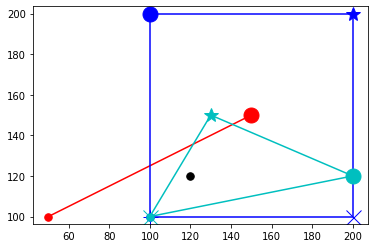

In [8]:
draw_graph([point, line,  square, triangle])

\[
\begin{bmatrix}
  x' \\
  y' \\
  1
 \end{bmatrix} =  \begin{bmatrix}
  a_1 & a_2 & d_x \\
  a_3 & a_4 & d_y \\
  0 & 0 & 1
 \end{bmatrix} 
 \begin{bmatrix}
  x \\
  y \\
  1
 \end{bmatrix}
 \]

In [9]:
# Преобразование масштабирования
def scale(shape, kx=1, ky=1):
    H = np.array([[kx,  0, 0],
                  [ 0, ky, 0],
                  [ 0,  0, 1]])
    
    A = np.vstack((shape, np.ones(shape.shape[1])))
    return (H @ A)[:2] 
    

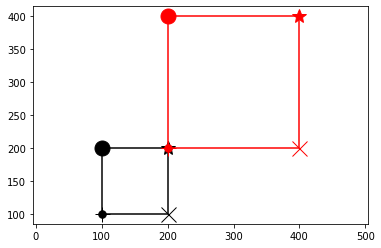

In [24]:
shape = square
kx = 2
ky = 2

draw_graph([shape, scale(shape, kx=kx, ky=ky)])

In [17]:
# Преобразование переноса
def move(shape, dx=0, dy=0):
    H = np.array([[ 1,  0, dx],
                  [ 0,  1, dy],
                  [ 0,  0,  1]])
    
    A = np.vstack((shape, np.ones(shape.shape[1])))
    return (H @ A)[:2] 

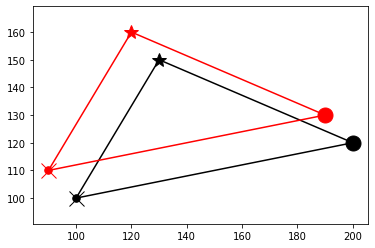

In [22]:
shape = triangle
dx = -10
dy = 10

draw_graph([shape, 
            move(shape, dx=dx, dy=dy)
           ])

In [23]:
# Преобразование масштабирование относительно точки (xc, yc)
def scale_xy(shape, kx=1, ky=1, xc=0, yc=0):
    
    # Смещение центра масштабирования в центр начала координат
    tmp_shape = move(shape, dx=-xc, dy=-yc) 
    
    # Масштабирование относительно начала координат
    tmp_shape = scale(tmp_shape, kx=kx, ky=ky)
    
    # Обратное смещение фигуры
    tmp_shape = move(tmp_shape, dx=xc, dy=yc) 
    
    return tmp_shape

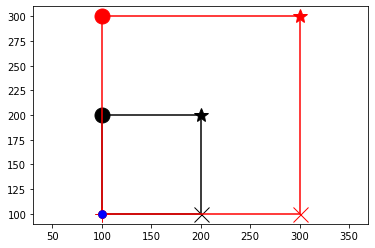

In [29]:
shape = square
kx=2
ky=2
xc = 100
yc = 100

draw_graph([shape,
            scale_xy(shape, kx=kx, ky=ky, xc=xc, yc=yc), 
            np.array([[xc],[yc]])
           ])

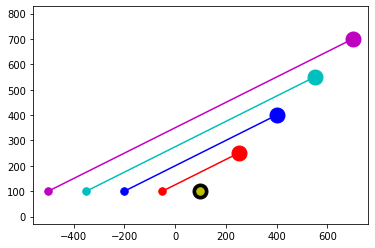

In [28]:
shape = line
xc = shape[0][0]
yc = shape[1][0]


xc = 100
yc = 100

shapes = [scale_xy(shape, xc=xc, yc=yc, kx=k, ky=k) for k in range(0,14, 3)]
shapes.append(np.array([[xc],[yc]]))

draw_graph(shapes)

In [30]:
# Преобразование поворота
def rotate(shape, angle=0):
    H = np.array([[ cos(angle), -sin(angle), 0],
                  [ sin(angle),  cos(angle), 0],
                  [          0,           0, 1]])
    
    A = np.vstack((shape, np.ones(shape.shape[1])))
    return (H @ A)[:2] 

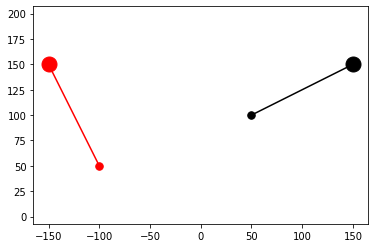

In [36]:
shape = line
angle = pi/2

draw_graph([shape,
            rotate(shape, angle=angle)
           ])

In [33]:
# Преобразование поворота вокруг точки (xc, yc)
def rotate_xy(shape, xc=0, yc=0, angle=0):
    
    # Смещение центра поворота в центр начала координат
    tmp_shape = move(shape, dx=-xc, dy=-yc) 
    
    # Поворот относительно начала координат
    tmp_shape = rotate(tmp_shape, angle=angle)
    
    # Обратное смещение фигуры
    tmp_shape = move(tmp_shape, dx=xc, dy=yc) 
    
    return tmp_shape

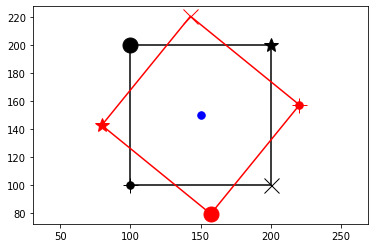

In [42]:
shape = square
xc=150
yc=150
angle = 36*pi/46

draw_graph([shape, 
            rotate_xy(shape, xc=xc, yc=yc, angle=angle),
            np.array([[xc],[yc]])
           ])

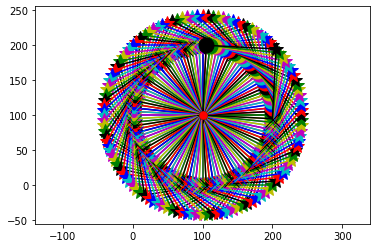

In [46]:
shape = square
xc = shape[0][0]
yc = shape[1][0]

#xc = 150
#yc = 120

shapes = [rotate_xy(shape, xc=xc, yc=yc, angle=angle*pi/180) for angle in range(0,360, 3)]
shapes.append(np.array([[xc],[yc]]))

draw_graph(shapes)

In [47]:
# Афинное преобразование
def transform(shape, kx=1, ky=1, dx=0, dy=0, angle=0):
    H = np.array([[ kx*cos(angle),   -sin(angle), dx],
                  [    sin(angle), ky*cos(angle), dy],
                  [             0,             0,  1]])
    
    A = np.vstack((shape, np.ones(shape.shape[1])))
    return (H @ A)[:2] 

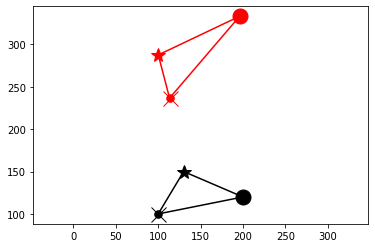

In [50]:
shape = triangle
kx = 2
ky = 1
dx = 100
dy = 100
angle = pi/3


draw_graph([shape, 
            transform(shape, kx=kx, ky=ky, dx=dx, dy=dy, angle=angle)
           ])

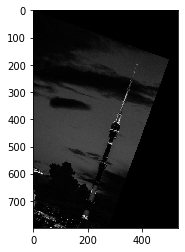

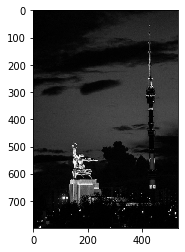

In [53]:
from scipy import ndimage
from PIL import Image

dx = 100
dy = 100
kx=1
ky=1

angle = pi/9
img_path = './img/ostankino.jpg'

A = np.array([[ kx*cos(angle), -sin(angle), 0],
              [ sin(angle),  ky*cos(angle), 0],
              [          0,           0, 1]])

b = np.array([[dx],
              [dy],
              [1]])


im = Image.open(img_path).convert('L')
transform_im = ndimage.affine_transform(im,A,b,)

plt.figure()
plt.gray()
plt.imshow(transform_im)
plt.show()

plt.imshow(im)
plt.show()

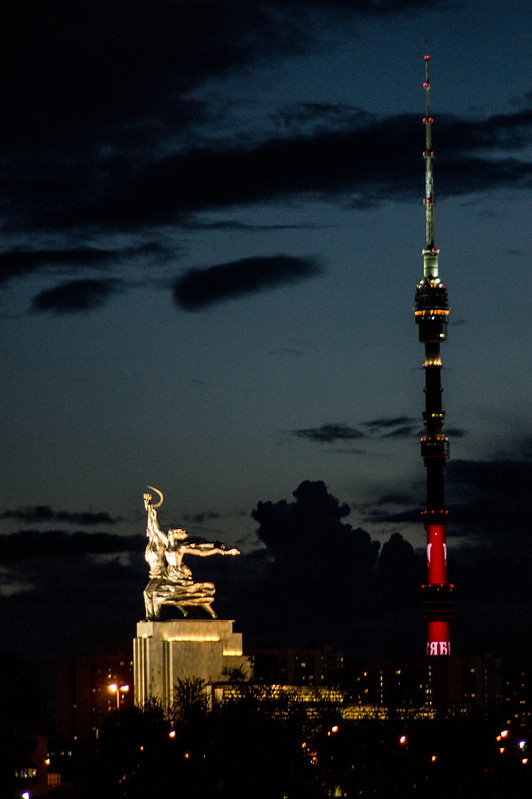

In [54]:
im

Image.open(img_path)

In [55]:
# Преобразование зеркального отражения
def mirror(shape, angle=pi):
    H = np.array([[ cos(2*angle),  sin(2*angle), 0],
                  [ sin(2*angle), -cos(2*angle), 0],
                  [          0,           0, 1]])
    
    A = np.vstack((shape, np.ones(shape.shape[1])))
    return (H @ A)[:2] 

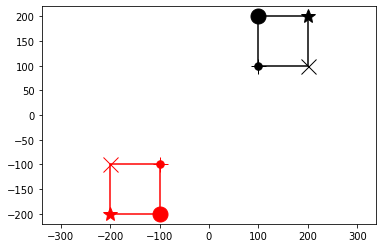

In [58]:
shape = square
angle = pi

draw_graph([shape, 
            rotate(shape, angle=angle)
           ])

In [27]:
# Преобразование поворота осей
def rotate_axes(shape, angle_x=0, angle_y=0):
    H = np.array([[            1, tan(angle_y), 0],
                  [ tan(angle_x),            1, 0],
                  [            0,            0, 1]])
    
    A = np.vstack((shape, np.ones(shape.shape[1])))
    return (H @ A)[:2] 

In [42]:
img_path = './img/ostankino.jpg'


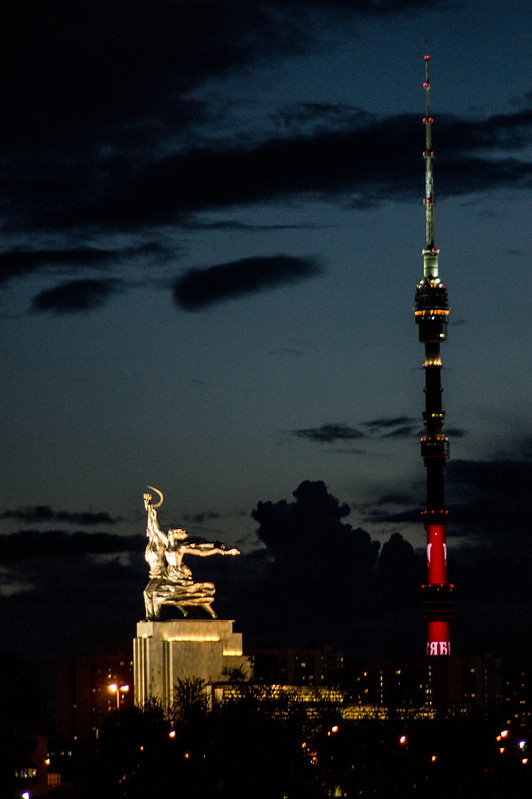

In [43]:
Image.open(img_path)

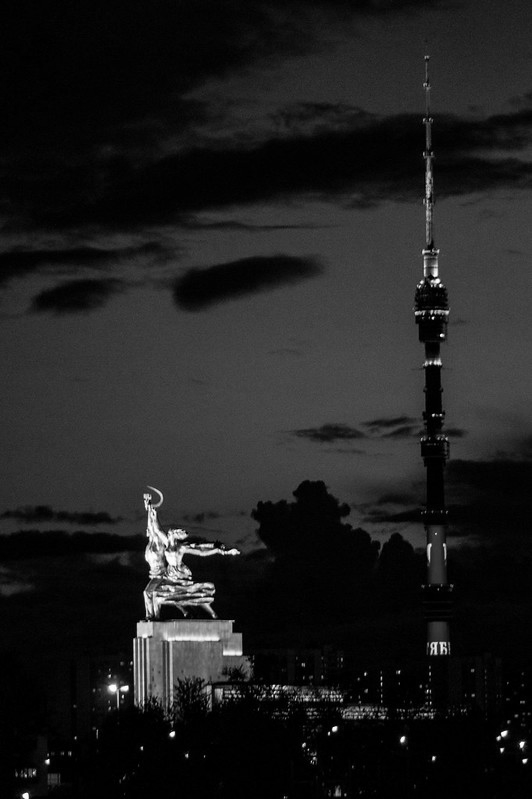

In [44]:
# https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
Image.open(img_path).convert('L')

# Заголовок
ывывЫывыВм гр лр лр гл ршг ршг р шгр гшр г *гпгшнгннг*



$ x^2=7 $

In [ ]:
# Создание миниатюр
img = Image.open(img_path)
img.thumbnail((128,128))
img

In [ ]:
# Копирование и вставка областей
img = Image.open(img_path)
box = (100,450,250,750)
region = img.crop(box)
region

In [ ]:
# Копирование и вставка областей
region = region.transpose(Image.ROTATE_180)
img.paste(region,box)
img

In [ ]:
# Изменение размера изображения
img.resize((240,380))

In [ ]:
# Поворот изображения
img.rotate(35)

In [29]:
# Прочитать изображение в массив
img = np.array(Image.open(img_path))
img

array([[[ 1,  1,  3],
        [ 1,  1,  3],
        [ 2,  2,  4],
        ...,
        [16, 33, 51],
        [16, 33, 51],
        [15, 32, 48]],

       [[ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3],
        ...,
        [12, 33, 50],
        [12, 33, 50],
        [12, 33, 50]],

       [[ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3],
        ...,
        [12, 38, 53],
        [13, 36, 52],
        [12, 35, 51]],

       ...,

       [[ 0,  0,  0],
        [ 2,  2,  2],
        [ 3,  3,  3],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8)

In [30]:
# Создать новый рисунок
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
# Не использовать цвета
plt.gray()

<Figure size 432x288 with 0 Axes>

(300, 400, 3) uint8


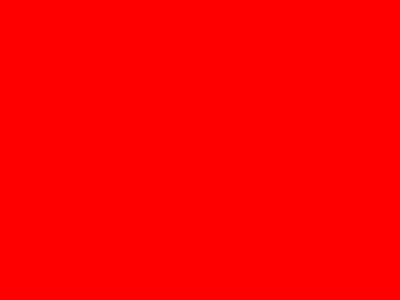

In [32]:
img_path = './img/red.jpg'
img = np.array(Image.open(img_path))
print(img.shape, img.dtype)
Image.open(img_path)

In [33]:
img

array([[[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]],

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]],

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]],

       ...,

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]],

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]],

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]]

In [34]:
x = 30
y = 30
print(img[x,y,0], img[x,y,1], img[x,y,2])


254 0 0


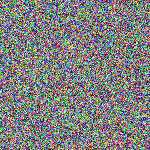

In [69]:
# Генерация изображения

from random import randint
img_array = np.asarray([ [[randint(0,255), randint(0,255), randint(0,255)] for x in range(0,150)] 
                        for y in range(0,150)])

Image.fromarray(np.uint8(img_array))

Image.fromarray(np.uint8(img_array)).save('./img/rand.jpg')
Image.fromarray(np.uint8(img_array))

In [60]:
img = Image.open('./img/rand.jpg')
a = np.asarray(img)
a

array([[[255, 181, 154],
        [159,  62,  93],
        [187, 113, 188],
        ...,
        [156,  80, 129],
        [170,  80, 132],
        [206,  50,  90]],

       [[121,  72,  76],
        [ 61,  70,  53],
        [ 30,  96,  60],
        ...,
        [ 99,  94, 124],
        [ 58,  79, 106],
        [ 77,  75,  99]],

       [[159, 171, 149],
        [153, 228, 172],
        [ 70, 190, 100],
        ...,
        [120, 166, 163],
        [  0, 110,  93],
        [ 44, 180, 170]],

       ...,

       [[ 87,   0,  63],
        [121,  92, 114],
        [112, 124, 100],
        ...,
        [ 43, 113,  51],
        [111, 136,  81],
        [145, 151, 107]],

       [[249, 201, 251],
        [ 48,  81,  62],
        [ 65, 152,  81],
        ...,
        [ 21,  61,  27],
        [167, 156, 128],
        [118,  83,  63]],

       [[179,  74, 228],
        [ 47,  57,  20],
        [153, 247,  71],
        ...,
        [ 61, 113,  90],
        [149, 146, 127],
        [ 98,  66,  55]]